In [61]:
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import seaborn as sns

from sklearn.tree import DecisionTreeClassifier


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
df = pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
X= df.iloc[:,1:]
y = df.drop(columns=['Age','Fare'])

In [19]:
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [20]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [21]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [23]:
y_train.head()

,Survived
328,1
73,0
253,0
719,0
666,0


Without Binning

In [28]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [29]:
np.mean(cross_val_score(clf,X,y,cv = 10,scoring='accuracy'))

0.6274843505477307

With Binning

In [50]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [51]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [52]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [53]:
trf.named_transformers_['first'].n_bins_

trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [54]:
trf.named_transformers_['second'].n_bins_

trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [55]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [56]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [57]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
731,11.0,1.0,18.7875,8.0,"(6.0, 16.0]","(18.75, 26.0]"
114,17.0,2.0,14.4583,7.0,"(16.0, 19.0]","(14.454, 18.75]"
638,41.0,11.0,39.6875,11.0,"(38.0, 42.0]","(31.275, 51.479]"
452,30.0,8.0,27.7500,10.0,"(28.0, 30.0]","(26.55, 31.275]"
360,40.0,11.0,27.9000,10.0,"(38.0, 42.0]","(26.55, 31.275]"


In [58]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)


In [59]:
accuracy_score(y_test,y_pred2)


0.6363636363636364

In [60]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring ='accuracy'))

0.6303208137715179

In [74]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring ='accuracy')))

    #plot for age
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X['Age'],kde=True)
    plt.title('Before')

    plt.subplot(122)
    sns.histplot(X_trf[:,0],color='red',kde=True)
    plt.title('After')
    
    plt.show()

    # plot for Fare
    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    sns.histplot(X['Fare'], kde=True)  # Before transformation
    plt.title('Before Fare Discretization')

    plt.subplot(122)
    sns.histplot(X_trf[:, 1], color='green', kde=True)  # After transformation for Fare
    plt.title('After Fare Discretization')

    plt.show()

0.6317097026604068


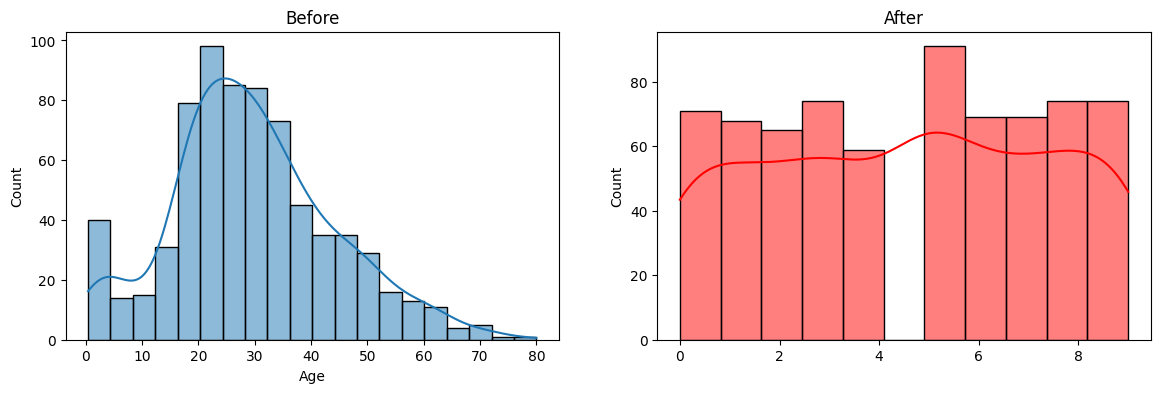

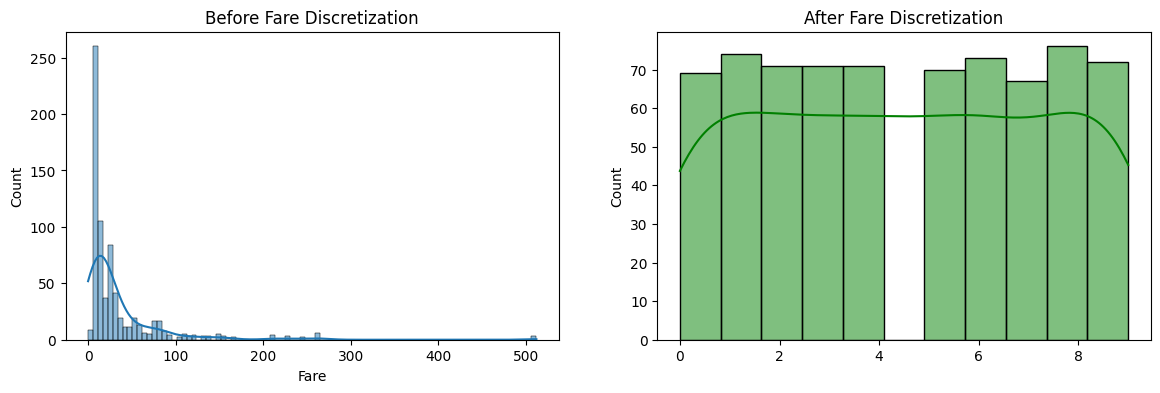

In [73]:
discretize(10,'quantile')

0.6344874804381846


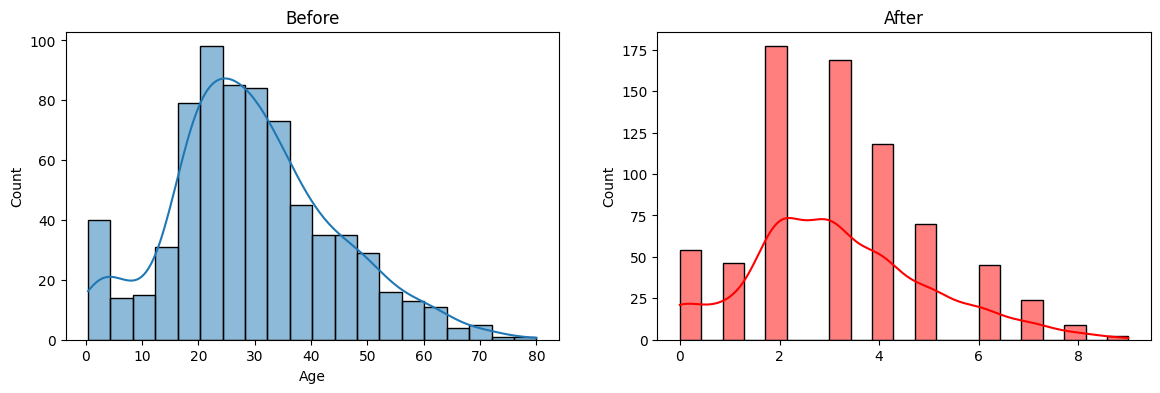

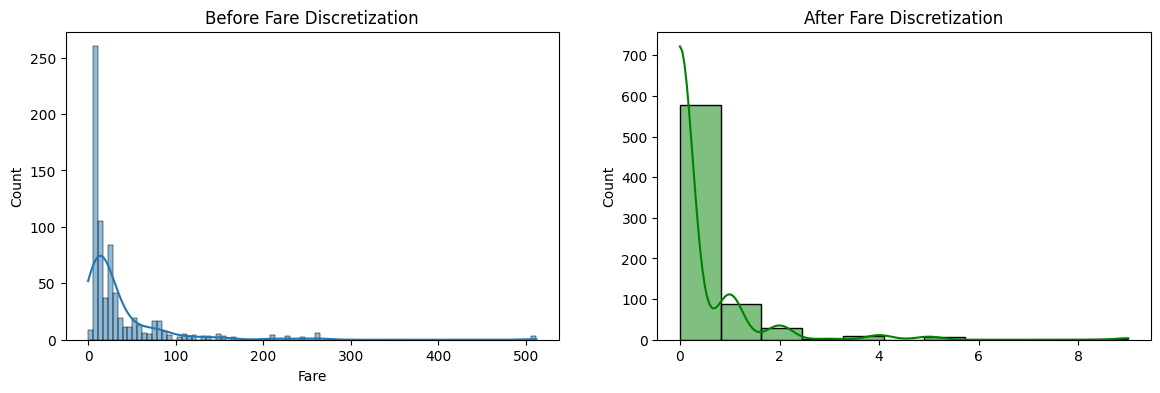

In [75]:
discretize(10,'uniform')

0.6317097026604068


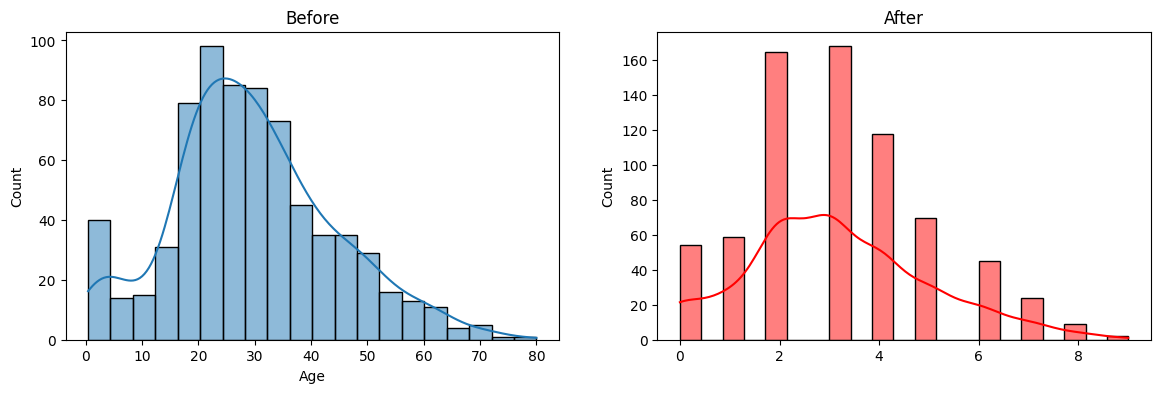

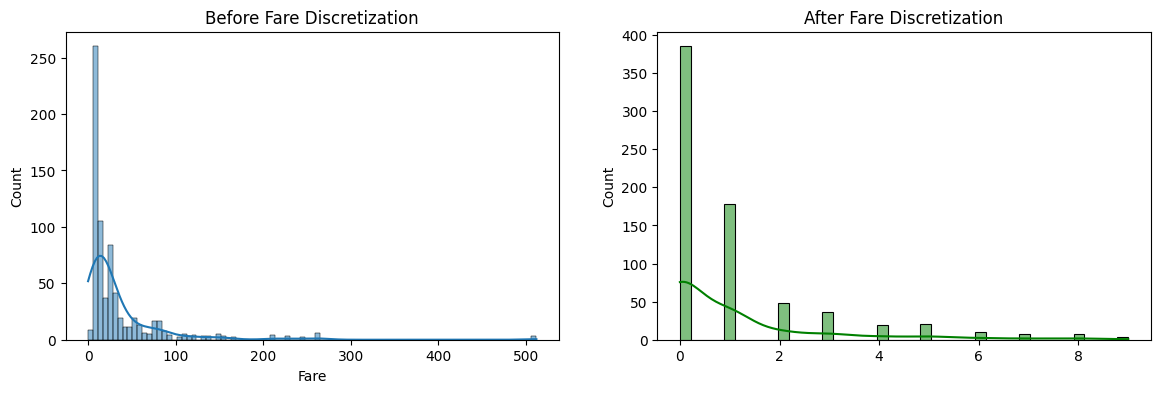

In [77]:
discretize(10,'kmeans')